#  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Cardio Good Fitness

<font color=darkblue>

&nbsp;

<p align="center">
The data is about customers of the treadmill product(s) of a retail store called <b>Cardio Good Fitness</b>. This Dashboards explores the CSV data provided, generate key business insights identifying customer profiles and recommendations on the actions the company could take when targeting new customers.
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:
  
<font color=darkblue>

&nbsp;

1. Import necessary libraries and Load Data
2. Univariate Data Analysis
3. Checking distribution of data
4. Multivariate Data Analysis
5. Conclusion and Recommendations

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling                            # Used to create profile summary of the data

sns.set(color_codes=True)                          # Displays charts with background colors
%matplotlib inline

main_data= pd.read_csv('CardioGoodFitness.csv');   # Load the data

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Scan The Data:
   
<p align="center">
Eplore the data structure
</p>

In [2]:
nulls_series             = main_data.isna().sum()      # Get a series counting number of empty values for each column
nonnulls_series          = main_data.notnull().sum()   # Get a series counting number of non empty valuesfor each column 
column_datatypes         = main_data.dtypes            # Get a series containing data types for each column 


nulls_count_df = pd.concat(
    [nulls_series, nonnulls_series, column_datatypes],               
    axis=1,                                            # Concatenate using columns as axis. 
    keys=["Nulls", "Non-Nulls", "Type"],               # Add Columns as for the nulls and non-nulls values
    sort=True)


print(" ")
print("Rows x Columns = " + str(main_data.shape))      # Print out the dimensions of the data frame


print(" ")
print(nulls_count_df)                                  # Display the nulls count table

 
Rows x Columns = (180, 9)
 
               Nulls  Non-Nulls    Type
Age                0        180   int64
Education          0        180   int64
Fitness            0        180   int64
Gender             0        180  object
Income             0        180   int64
MaritalStatus      0        180  object
Miles              0        180   int64
Product            0        180  object
Usage              0        180   int64


In [3]:
main_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
main_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
#pandas_profiling.ProfileReport(main_data)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Univariate Data Analysis:
   
<p align="center">
Eplore indiviual columns.
</p>

 <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea">2.1 Set Up Dashboard Theme:

In [6]:
good_and_bad_colors = ["#D50000", "00E676"]            # Set red and blue for good and bad colors
gender_colors       = ["#EC407A", "#42A5F5"]           # Set of gender based colors to use (pink and blue)

sns.set_theme(
    context="notebook",
    font_scale=1.5,                                    # Set default font size.
    style="darkgrid");                                 # Set theme style

sns.set_palette(sns.color_palette(gender_colors))      # Set default colors

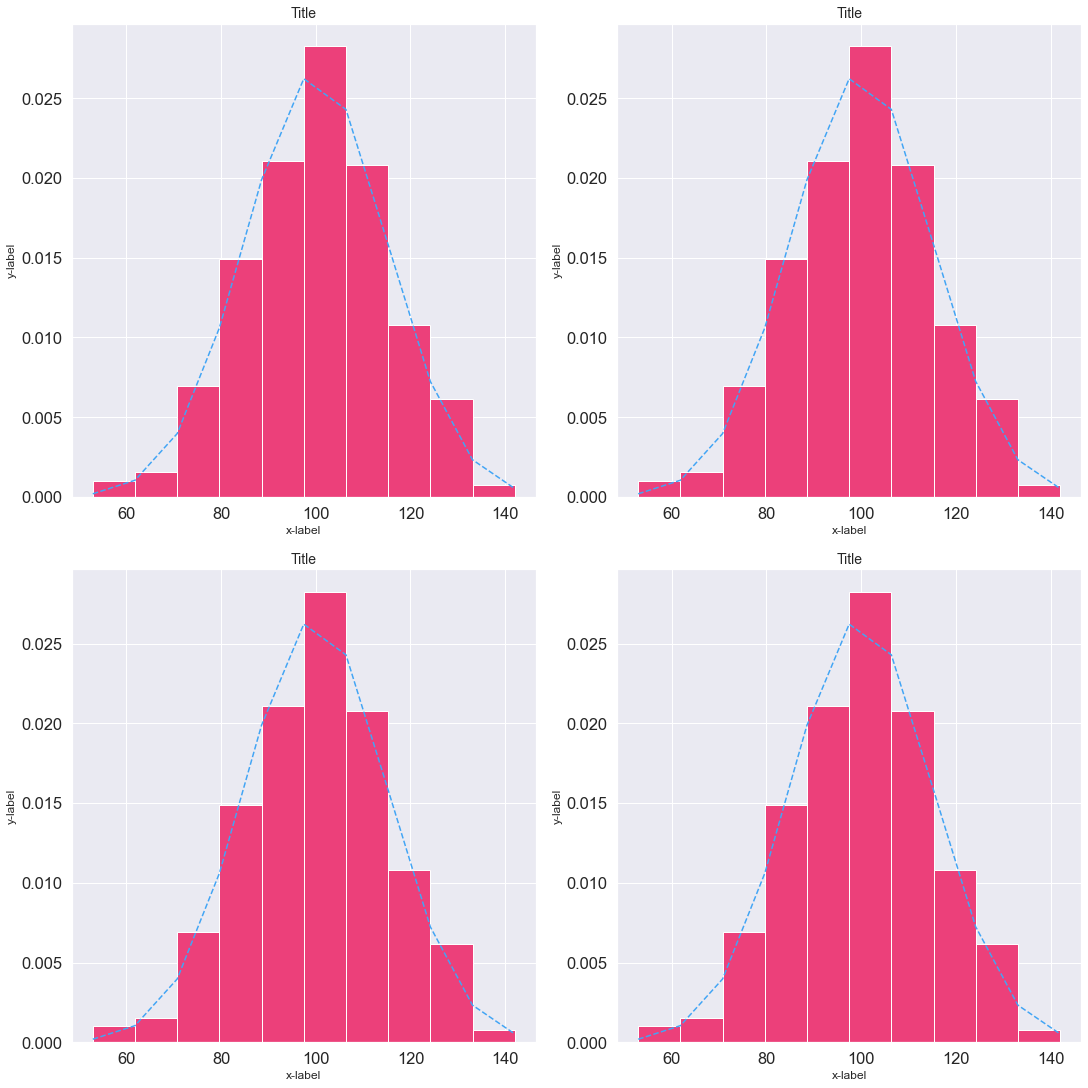

In [7]:
def example_plot(ax):
    np.random.seed(19680801)
    mu = 100
    sigma = 15
    x = mu + sigma * np.random.randn(437)
    num_bins = 10
    n, bins, patches = ax.hist(x, num_bins, density=True)
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    # ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15), constrained_layout=True)
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax in axs.flat:
    example_plot(ax)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Multivariate Data Analysis:
   
<p align="center">
Multivariate Data Analysis
</p>

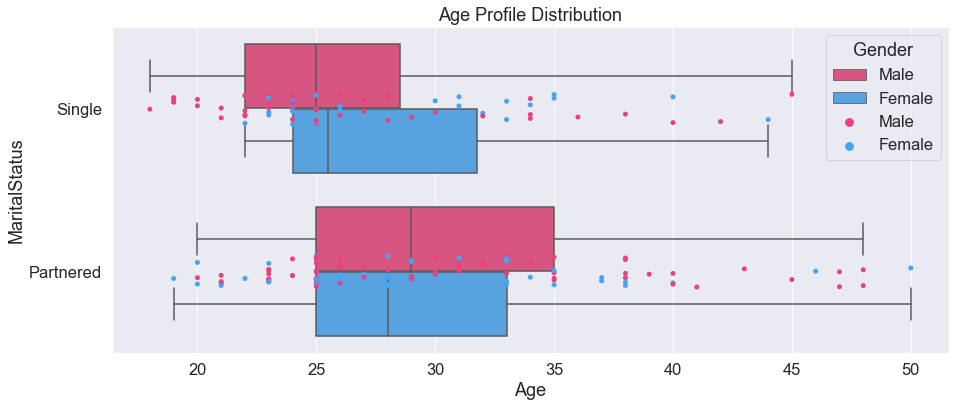

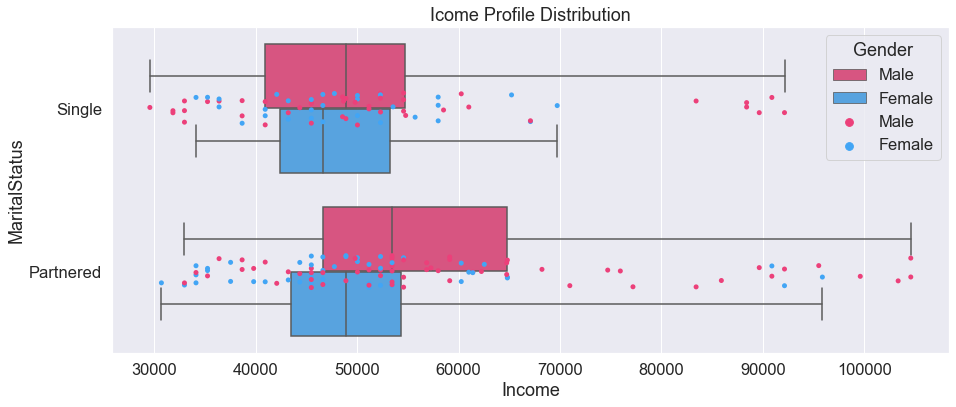

In [8]:
plt.subplots(figsize=(15, 6))                          # Set chart size
axs = sns.boxplot(x="Age",
            y="MaritalStatus",
            data=main_data,
            whis=[0, 100],
            hue="Gender")
axs.set_title("Age Profile Distribution")
sns.stripplot(x=main_data['Age'], y=main_data['MaritalStatus'], hue=main_data['Gender'])

plt.subplots(figsize=(15, 6))
sns.set_palette(sns.color_palette(gender_colors))
axs = sns.boxplot(
            x="Income",
            y="MaritalStatus",
            data=main_data,
            whis=[0, 100],
            hue="Gender")
axs.set_title("Icome Profile Distribution")
sns.stripplot(x=main_data['Income'], y=main_data['MaritalStatus'], hue=main_data['Gender'])

plt.show()

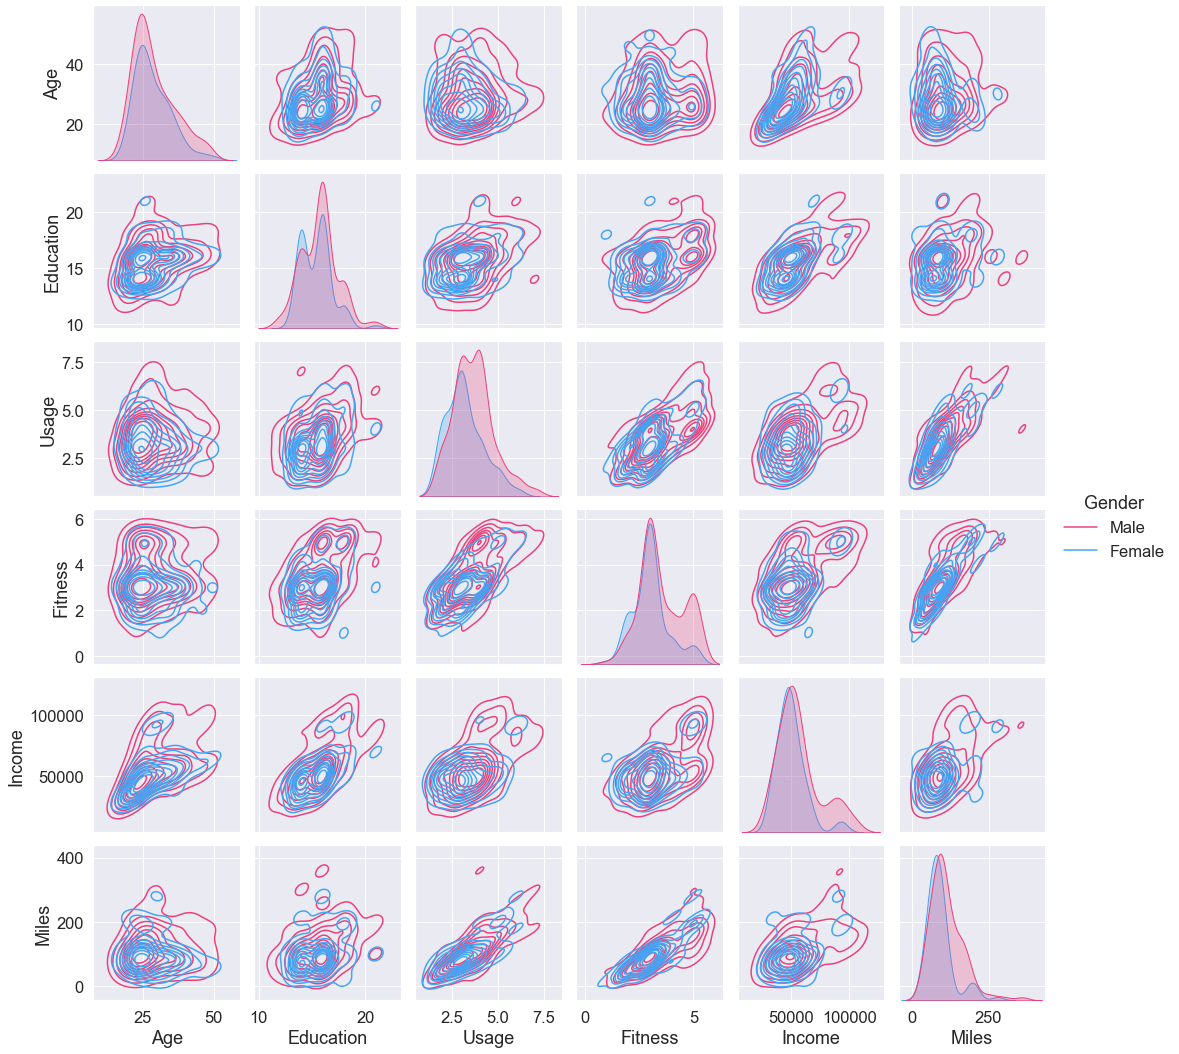

In [9]:
sns.pairplot(data=main_data, hue="Gender", kind="kde");

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Recommendations:
   
<p align="center">
Multivariate Data Analysis
</p>